#### Copyright 2020 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image Classification Project

In this project we will build an image classification model and use the model to identify if the lungs pictured indicate that the patient has pneumonia. The outcome of the model will be true or false for each image.

The [data is hosted on Kaggle](https://www.kaggle.com/rob717/pneumonia-dataset) and consists of 5,863 x-ray images. Each image is classified as 'pneumonia' or 'normal'.

## Ethical Considerations

We will frame the problem as:

> *A hospital is having issues correctly diagnosing patients with pneumonia. Their current solution is to have two trained technicians examine every patient scan. Unfortunately, there are many times when two technicians are not available, and the scans have to wait for multiple days to be interpreted.*
>
> *They hope to fix this issue by creating a model that can identify if a patient has pneumonia. They will have one technician and the model both examine the scans and make a prediction. If the two agree, then the diagnosis is accepted. If the two disagree, then a second technician is brought in to provide their analysis and break the tie.*

Discuss some of the ethical considerations of building and using this model. 

* Consider potential bias in the data that we have been provided. 
* Should this model err toward precision or accuracy?
* What are the implications of massively over-classifying patients as having pneumonia?
* What are the implications of massively under-classifying patients as having pneumonia?
* Are there any concerns with having only one technician make the initial call?

The questions above are prompts. Feel free to bring in other considerations you might have.

### **Student Solution**

> The data has a potential sampling bias. There is potential sampling bias if the data does not provide a wide variety of x-rays because a pneumonia x-ray could more easily be confused with another disease. This model should aim for both precision and accuracy to help the most patients. The implications of a model massively over-classifying patients as having pneumonia is that it is inefficient in time and more expensive. The implications of massively under-classifying patients as having pneumonia is that more patients are more at risk of not receiving the healthcare they need. The concern of having only one technician make the initial call is that it is only one experts perspective. For example one expert may have additional knowledge about another disease and recognize it on an x-ray. The benefit of one technician is that it is more flexible and efficient for technicians and patients.  

---

## Modeling

In this section of the lab, you will build, train, test, and validate a model or models. The data is the ["Detecting Pneumonia" dataset](https://www.kaggle.com/rob717/pneumonia-dataset). You will build a binary classifier that determines if an x-ray image has pneumonia or not.

You'll need to:

* Download the dataset
* Perform EDA on the dataset
* Build a model that can classify the data
* Train the model using the training portion of the dataset. (It is already split out.)
* Test at least three different models or model configurations using the testing portion of the dataset. This step can include changing model types, adding and removing layers or nodes from a neural network, or any other parameter tuning that you find potentially useful. Score the model (using accuracy, precision, recall, F1, or some other relevant score(s)) for each configuration.
* After finding the "best" model and parameters, use the validation portion of the dataset to perform one final sanity check by scoring the model once more with the hold-out data.
* If you train a neural network (or other model that you can get epoch-per-epoch performance), graph that performance over each epoch.

Explain your work!

> *Note: You'll likely want to [enable GPU in this lab](https://colab.research.google.com/notebooks/gpu.ipynb) if it is not already enabled.*

If you get to a working solution you're happy with and want another challenge, you'll find pre-trained models on the [landing page of the dataset](https://www.kaggle.com/paultimothymooney/detecting-pneumonia-in-x-ray-images). Try to load one of those and see how it compares to your best model.

Use as many text and code cells as you need to for your solution.

### **Student Solution**

#### Load in Dataset

In [2]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle datasets download paultimothymooney/chest-xray-pneumonia
! unzip -q /content/chest-xray-pneumonia.zip
! ls

Done
100% 2.29G/2.29G [00:14<00:00, 209MB/s]
100% 2.29G/2.29G [00:14<00:00, 167MB/s]
chest_xray  chest-xray-pneumonia.zip  sample_data


In [3]:
import pandas as pd
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
train_list = []

rootdir = "../content/chest_xray/train/NORMAL"
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image = cv2.imread(os.path.join(subdir, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        train_list.append(gray)
        # tensor = tf.convert_to_tensor(gray, dtype=tf.uint8)
        # train_list.append(tensor)

train_df = pd.DataFrame(train_list, columns= ['image'])
del train_list

train_df['pneumonia'] = 0

print(train_df.sample(5))

train_list = []

rootdir = "../content/chest_xray/train/PNEUMONIA"
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image = cv2.imread(os.path.join(subdir, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        train_list.append(gray)
        # tensor = tf.convert_to_tensor(gray, dtype=tf.uint8)
        # train_list.append(tensor)

temporary_df = pd.DataFrame(train_list, columns= ['image'])
del train_list

temporary_df['pneumonia'] = 1

print(temporary_df.sample(5))

train_df = train_df.append(temporary_df,ignore_index= True)

print(train_df.sample(5))
train_df.groupby('pneumonia').count()

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


                                                  image  pneumonia
1306  [[47, 48, 47, 45, 43, 41, 39, 36, 35, 36, 37, ...          0
348   [[0, 1, 3, 0, 1, 255, 247, 255, 250, 255, 255,...          0
361   [[0, 53, 52, 53, 50, 51, 52, 53, 53, 53, 53, 5...          0
185   [[41, 41, 36, 35, 35, 34, 33, 29, 26, 25, 23, ...          0
1332  [[0, 60, 58, 59, 57, 54, 54, 54, 56, 59, 62, 6...          0


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


                                                  image  pneumonia
863   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...          1
2724  [[46, 54, 47, 60, 50, 57, 29, 13, 10, 11, 10, ...          1
2012  [[6, 1, 1, 3, 1, 13, 54, 98, 116, 118, 114, 94...          1
2363  [[0, 70, 54, 52, 45, 40, 36, 31, 26, 23, 18, 1...          1
1392  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...          1
                                                  image  pneumonia
2769  [[197, 195, 195, 197, 194, 189, 189, 193, 198,...          1
896   [[92, 86, 84, 88, 91, 88, 87, 89, 89, 84, 82, ...          0
827   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...          0
3426  [[15, 17, 19, 18, 16, 15, 17, 19, 20, 19, 19, ...          1
2896  [[115, 111, 109, 109, 108, 108, 114, 123, 114,...          1


,image
pneumonia,
0,1341
1,3875


In [5]:
val_list = []

rootdir = "../content/chest_xray/val/NORMAL"
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image = cv2.imread(os.path.join(subdir, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        val_list.append(gray)
        # tensor = tf.convert_to_tensor(gray, dtype=tf.uint8)
        # val_list.append(tensor)

val_df = pd.DataFrame(val_list, columns= ['image'])
del val_list

val_df['pneumonia'] = 0

print(val_df.sample(5))

val_list = []

rootdir = "../content/chest_xray/val/PNEUMONIA"
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image = cv2.imread(os.path.join(subdir, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        val_list.append(gray)
        # tensor = tf.convert_to_tensor(gray, dtype=tf.uint8)
        # val_list.append(tensor)

temporary_df = pd.DataFrame(val_list, columns= ['image'])
del val_list

temporary_df['pneumonia'] = 1

print(val_df.sample(5))

val_df = val_df.append(temporary_df,ignore_index= True)

print(val_df.sample(5))
val_df.groupby('pneumonia').count()

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


                                               image  pneumonia
2  [[84, 85, 93, 96, 100, 255, 252, 254, 254, 254...          0
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...          0
3  [[169, 171, 156, 167, 163, 255, 253, 251, 255,...          0
1  [[1, 12, 7, 7, 8, 9, 9, 8, 10, 11, 14, 17, 18,...          0
5  [[46, 54, 59, 60, 60, 255, 251, 251, 254, 255,...          0


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


                                               image  pneumonia
2  [[84, 85, 93, 96, 100, 255, 252, 254, 254, 254...          0
4  [[20, 22, 16, 25, 20, 255, 254, 254, 252, 253,...          0
6  [[3, 0, 4, 1, 5, 254, 248, 255, 250, 255, 252,...          0
3  [[169, 171, 156, 167, 163, 255, 253, 251, 255,...          0
7  [[67, 60, 68, 56, 67, 255, 255, 251, 250, 255,...          0
                                                image  pneumonia
6   [[3, 0, 4, 1, 5, 254, 248, 255, 250, 255, 252,...          0
13  [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,...          1
15  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...          1
4   [[20, 22, 16, 25, 20, 255, 254, 254, 252, 253,...          0
5   [[46, 54, 59, 60, 60, 255, 251, 251, 254, 255,...          0


,image
pneumonia,
0,8
1,8


In [6]:
test_list = []

rootdir = "../content/chest_xray/test/NORMAL"
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image = cv2.imread(os.path.join(subdir, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        test_list.append(gray)
        # tensor = tf.convert_to_tensor(gray, dtype=tf.uint8)
        # test_list.append(tensor)

test_df = pd.DataFrame(test_list, columns= ['image'])
del test_list

test_df['pneumonia'] = 0

print(test_df.sample(5))

test_list = []

rootdir = "../content/chest_xray/test/PNEUMONIA"
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image = cv2.imread(os.path.join(subdir, file))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        test_list.append(gray)
        # tensor = tf.convert_to_tensor(gray, dtype=tf.uint8)
        # test_list.append(tensor)

temporary_df = pd.DataFrame(test_list, columns= ['image'])
del test_list

temporary_df['pneumonia'] = 1

print(test_df.sample(5))

test_df = test_df.append(temporary_df,ignore_index= True)

print(test_df.sample(5))
test_df.groupby('pneumonia').count()

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


                                                 image  pneumonia
82   [[0, 40, 41, 39, 45, 36, 37, 36, 35, 35, 36, 3...          0
171  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...          0
68   [[30, 32, 34, 34, 34, 34, 36, 38, 37, 38, 39, ...          0
232  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...          0
34   [[67, 68, 68, 69, 69, 68, 68, 67, 68, 68, 68, ...          0


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


                                                 image  pneumonia
56   [[0, 66, 55, 64, 64, 63, 63, 64, 65, 64, 63, 6...          0
51   [[0, 42, 42, 39, 45, 38, 40, 41, 47, 43, 38, 3...          0
199  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...          0
88   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...          0
80   [[0, 26, 26, 28, 30, 24, 28, 24, 24, 24, 24, 2...          0
                                                 image  pneumonia
167  [[56, 59, 61, 60, 58, 57, 59, 62, 62, 63, 64, ...          0
589  [[116, 118, 115, 119, 140, 146, 106, 54, 10, 6...          1
260  [[4, 96, 97, 99, 93, 98, 104, 104, 112, 111, 1...          1
623  [[59, 62, 71, 86, 104, 118, 123, 123, 130, 135...          1
420  [[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, ...          1


,image
pneumonia,
0,234
1,390


#### EDA

Important to note that training data is biased with over twice as many cases with pneumonia than not. Validation data is evenly split but with only 16 total data entries. Testing data has about 1.5 times as many cases with pneumonia than not.

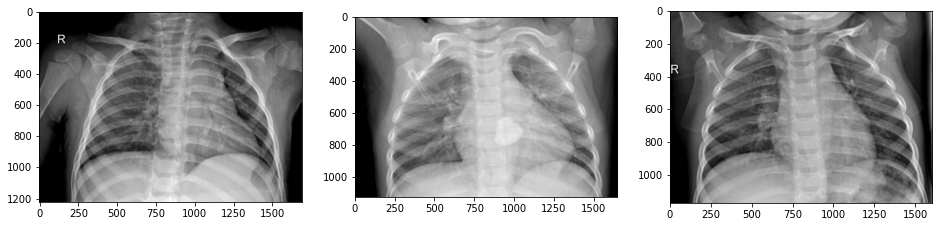

In [7]:
# three sample x-rays are shown from the category 'No Pneumonia'.
rootdir = "../content/chest_xray/train/NORMAL"
normalImages = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image = cv2.imread(os.path.join(subdir, file))
        normalImages.append(image)

plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(normalImages[0])
plt.subplot(132)
plt.imshow(normalImages[1])
plt.subplot(133)
plt.imshow(normalImages[2])

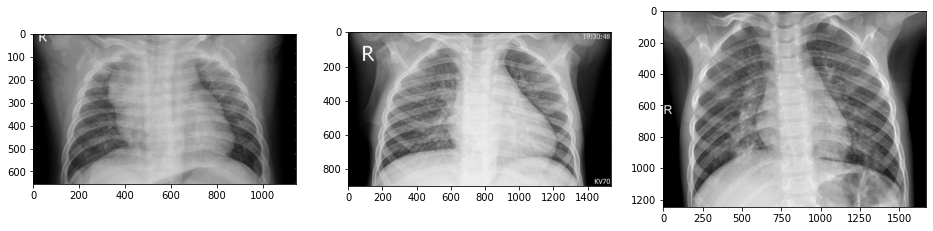

In [8]:
# three sample x-rays are shown from the category 'Pneumonia'.
rootdir = "../content/chest_xray/train/PNEUMONIA"
normalImages = []
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        image = cv2.imread(os.path.join(subdir, file))
        normalImages.append(image)

plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(normalImages[0])
plt.subplot(132)
plt.imshow(normalImages[1])
plt.subplot(133)
plt.imshow(normalImages[2])

It can be seen that images vary in orientation (rotation) and size (height, width). Images will need to be resized to consistent target size, but orientation should not affect model training.

---

#### Model Iteration 1

* target_size set as (100, 100)
* batch_size set as {train:64, val:16, test:64}
* early_stopping {min_delta=0.2, patience:3}


In [9]:
train_dir = "../content/chest_xray/train/"
train_categories = set(os.listdir(train_dir))
val_dir = "../content/chest_xray/val/"
val_categories = set(os.listdir(val_dir))
test_dir = "../content/chest_xray/test/"
test_categories = set(os.listdir(test_dir))

if train_categories.symmetric_difference(test_categories):
  print("Warning!: ", train_categories.symmetric_difference(test_categories))

print(sorted(train_categories))
print(len(train_categories))

['NORMAL', 'PNEUMONIA']
2


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy', 'accuracy'])
              # both of these accuracies should be the same, sanity check
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [11]:
train_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=train_dir,
    batch_size=64,
    image_data_generator=None)

val_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=val_dir,
    batch_size=16,
    image_data_generator=None)

test_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=test_dir,
    batch_size=64,
    image_data_generator=None)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    # minimum change in loss that qualifies as "improvement"
    # higher values of min_delta lead to earlier stopping
    min_delta=.2,
    # threshold for number of epochs with no improvement
    patience=3,
    verbose=1
)

In [13]:
history = model.fit(
    train_image_iterator,
    epochs=100,
    # validation_data=(np.asarray(val_df.image), np.asarray(val_df.pneumonia)),
    validation_data=val_image_iterator,
    callbacks=[early_stopping]
)

Epoch 1/100
82/82 [==============================] - 77s 746ms/step - loss: 8.1633 - binary_accuracy: 0.8852 - accuracy: 0.8852 - val_loss: 0.3562 - val_binary_accuracy: 0.7500 - val_accuracy: 0.7500
Epoch 2/100
82/82 [==============================] - 51s 620ms/step - loss: 0.1108 - binary_accuracy: 0.9595 - accuracy: 0.9595 - val_loss: 0.5239 - val_binary_accuracy: 0.7500 - val_accuracy: 0.7500
Epoch 3/100
82/82 [==============================] - 50s 612ms/step - loss: 0.0765 - binary_accuracy: 0.9709 - accuracy: 0.9709 - val_loss: 0.2945 - val_binary_accuracy: 0.8125 - val_accuracy: 0.8125
Epoch 4/100
82/82 [==============================] - 50s 609ms/step - loss: 0.0500 - binary_accuracy: 0.9808 - accuracy: 0.9808 - val_loss: 0.5123 - val_binary_accuracy: 0.8125 - val_accuracy: 0.8125
Epoch 00004: early stopping


Text(0.5, 0, 'epoch')

<Figure size 1152x360 with 0 Axes>

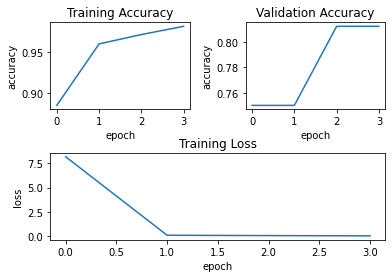

In [14]:
plt.figure(figsize=(16,5))

gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.4, hspace=0.5)
fig = plt.figure()

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train_accuracy'], loc='best')

ax2 = fig.add_subplot(gs[0,1])
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['val_accuracy'], loc='best')

ax3 = fig.add_subplot(gs[1,:])
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train_loss'], loc='best')

---

#### Model Iteration 2

* target_size set as (100, 100)
* batch_size set as {train:256, val:16, test:256}
* early_stopping {min_delta=0.2, patience:3}


In [15]:
train_dir = "../content/chest_xray/train/"
train_categories = set(os.listdir(train_dir))
val_dir = "../content/chest_xray/val/"
val_categories = set(os.listdir(val_dir))
test_dir = "../content/chest_xray/test/"
test_categories = set(os.listdir(test_dir))

if train_categories.symmetric_difference(test_categories):
  print("Warning!: ", train_categories.symmetric_difference(test_categories))

print(sorted(train_categories))
print(len(train_categories))

['NORMAL', 'PNEUMONIA']
2


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy', 'accuracy'])
              # both of these accuracies should be the same, sanity check
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [17]:
train_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=train_dir,
    batch_size=256,
    image_data_generator=None)

val_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=val_dir,
    batch_size=16,
    image_data_generator=None)

test_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(100, 100),
    directory=test_dir,
    batch_size=256,
    image_data_generator=None)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    # minimum change in loss that qualifies as "improvement"
    # higher values of min_delta lead to earlier stopping
    min_delta=.2,
    # threshold for number of epochs with no improvement
    patience=3,
    verbose=1
)

In [19]:
model_2 = model.fit(
    train_image_iterator,
    epochs=100,
    validation_data=val_image_iterator,
    callbacks=[early_stopping]
)

Epoch 1/100
21/21 [==============================] - 50s 2s/step - loss: 36.3485 - binary_accuracy: 0.6635 - accuracy: 0.6635 - val_loss: 0.3941 - val_binary_accuracy: 0.8125 - val_accuracy: 0.8125
Epoch 2/100
21/21 [==============================] - 49s 2s/step - loss: 0.2635 - binary_accuracy: 0.8936 - accuracy: 0.8936 - val_loss: 0.1964 - val_binary_accuracy: 0.9375 - val_accuracy: 0.9375
Epoch 3/100
21/21 [==============================] - 49s 2s/step - loss: 0.1153 - binary_accuracy: 0.9582 - accuracy: 0.9582 - val_loss: 0.3554 - val_binary_accuracy: 0.7500 - val_accuracy: 0.7500
Epoch 4/100
21/21 [==============================] - 49s 2s/step - loss: 0.0758 - binary_accuracy: 0.9737 - accuracy: 0.9737 - val_loss: 0.1545 - val_binary_accuracy: 0.9375 - val_accuracy: 0.9375
Epoch 00004: early stopping


Text(0.5, 0, 'epoch')

<Figure size 1152x360 with 0 Axes>

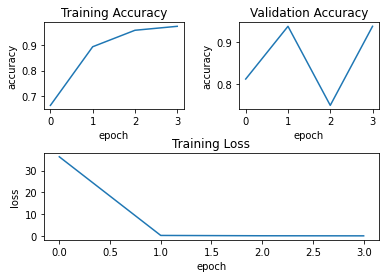

In [20]:
plt.figure(figsize=(16,5))

gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.4, hspace=0.5)
fig = plt.figure()

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(model_2.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train_accuracy'], loc='best')

ax2 = fig.add_subplot(gs[0,1])
plt.plot(model_2.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['val_accuracy'], loc='best')

ax3 = fig.add_subplot(gs[1,:])
plt.plot(model_2.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train_loss'], loc='best')

---

#### Model Iteration 3

* target_size set as (500, 500)
* batch_size set as {train:64, val:16, test:64}
* early_stopping {min_delta=0.2, patience:3}


In [21]:
train_dir = "../content/chest_xray/train/"
train_categories = set(os.listdir(train_dir))
val_dir = "../content/chest_xray/val/"
val_categories = set(os.listdir(val_dir))
test_dir = "../content/chest_xray/test/"
test_categories = set(os.listdir(test_dir))

if train_categories.symmetric_difference(test_categories):
  print("Warning!: ", train_categories.symmetric_difference(test_categories))

print(sorted(train_categories))
print(len(train_categories))

['NORMAL', 'PNEUMONIA']
2


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu',
                           input_shape=(500, 500, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_accuracy', 'accuracy'])
              # both of these accuracies should be the same, sanity check
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 500, 500, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 250, 250, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 250, 250, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)           

In [23]:
train_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(500, 500),
    directory=train_dir,
    batch_size=64,
    image_data_generator=None)

val_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(500, 500),
    directory=val_dir,
    batch_size=16,
    image_data_generator=None)

test_image_iterator = tf.keras.preprocessing.image.DirectoryIterator(
    target_size=(500, 500),
    directory=test_dir,
    batch_size=64,
    image_data_generator=None)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [24]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    # minimum change in loss that qualifies as "improvement"
    # higher values of min_delta lead to earlier stopping
    min_delta=.2,
    # threshold for number of epochs with no improvement
    patience=3,
    verbose=1
)

In [25]:
model_3 = model.fit(
    train_image_iterator,
    epochs=100,
    validation_data=val_image_iterator,
    callbacks=[early_stopping]
)

Epoch 1/100
82/82 [==============================] - 69s 814ms/step - loss: 196.1244 - binary_accuracy: 0.8623 - accuracy: 0.8623 - val_loss: 1.8221 - val_binary_accuracy: 0.7500 - val_accuracy: 0.7500
Epoch 2/100
82/82 [==============================] - 67s 813ms/step - loss: 0.1136 - binary_accuracy: 0.9661 - accuracy: 0.9661 - val_loss: 0.3462 - val_binary_accuracy: 0.9375 - val_accuracy: 0.9375
Epoch 3/100
82/82 [==============================] - 66s 805ms/step - loss: 0.0345 - binary_accuracy: 0.9906 - accuracy: 0.9906 - val_loss: 0.3460 - val_binary_accuracy: 0.9375 - val_accuracy: 0.9375
Epoch 4/100
82/82 [==============================] - 67s 812ms/step - loss: 0.0191 - binary_accuracy: 0.9954 - accuracy: 0.9954 - val_loss: 0.4239 - val_binary_accuracy: 0.9375 - val_accuracy: 0.9375
Epoch 00004: early stopping


Text(0.5, 0, 'epoch')

<Figure size 1152x360 with 0 Axes>

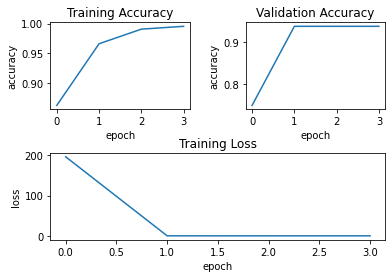

In [26]:
plt.figure(figsize=(16,5))

gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.4, hspace=0.5)
fig = plt.figure()

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(model_3.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train_accuracy'], loc='best')

ax2 = fig.add_subplot(gs[0,1])
plt.plot(model_3.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['val_accuracy'], loc='best')

ax3 = fig.add_subplot(gs[1,:])
plt.plot(model_3.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train_loss'], loc='best')

---

#### Evaluating Model 3

In [27]:
model.evaluate(test_image_iterator)

10/10 [==============================] - 9s 861ms/step - loss: 1.8040 - binary_accuracy: 0.7708 - accuracy: 0.7708


[1.8039813041687012, 0.7708333134651184, 0.7708333134651184]